# Houses price predictions

Houses prices prediction plays an important role, so as to facilitate decision making for buyers and investors.

The variation in houses prices refers to multiple criterias, such as: Localisation, approximity to downtown, commercial stores, public transports, area, and so on...

In this project, we will implément Machine Learning models, lile ( Generalized Linear Regression, Random Forest, and Gradient Boosting).

Our used Dataset is downloaded from www.kaggle.com, it contains 1480 rows and 81 features.

Before starting modelisation, we are going to do some explanatory analysis, followed by  data cleaning & imputation, modelisation, and performance evaluation based on RMSE criteria.

In a Data science project, knowing data,is so important, this step takes much more time, but it allows us to understand much more better our variables, detect outliers or any information could reduce the performance of our models.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

plt.style.use('ggplot')
import math
from math import sqrt

# Model

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("C:/Users/abdel/Documents/Projects/House_price/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We notice that the Median price is much higher than Mean price, which means that they are some expensive houses

### Take a loot at the distribution of the Target variable

<AxesSubplot:xlabel='SalePrice'>

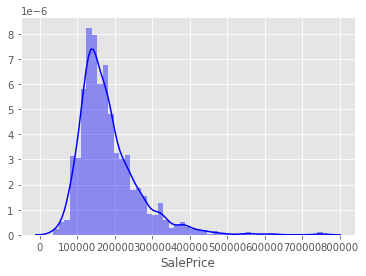

In [4]:
#histogram
sns.distplot(train['SalePrice'],color = 'blue')

We notice that our data are not normally distributed. So we have to normalize it by adding the Log

<AxesSubplot:xlabel='SalePrice'>

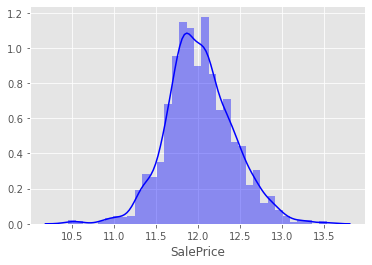

In [5]:
#histogram
sns.distplot(np.log(train['SalePrice']),color = 'blue')

Now, we analyze the correlation between the numerical variables and the target vatiable

In [6]:
correlation = train.drop('Id', axis = 1).select_dtypes(include=[np.number]).corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


HeatMap is a pretty good way to visualize correlation. Red color means that the variables are positively correlated, white color means that the variables are not correlated

<AxesSubplot:>

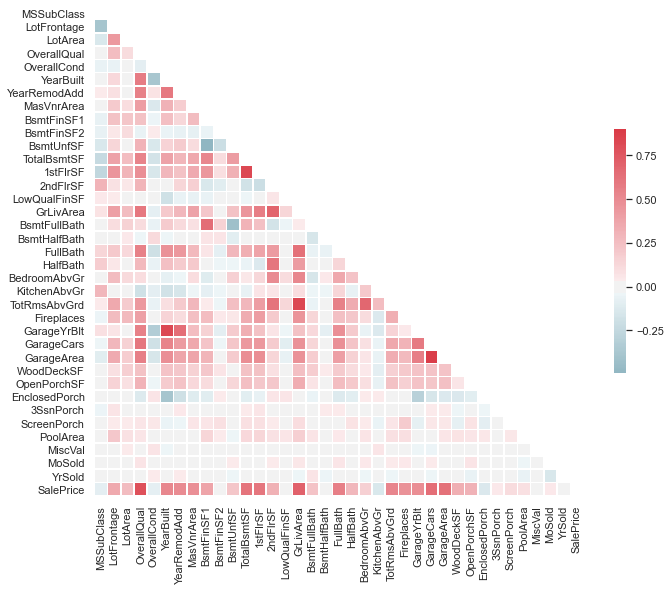

In [7]:
sns.set(style="white")
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

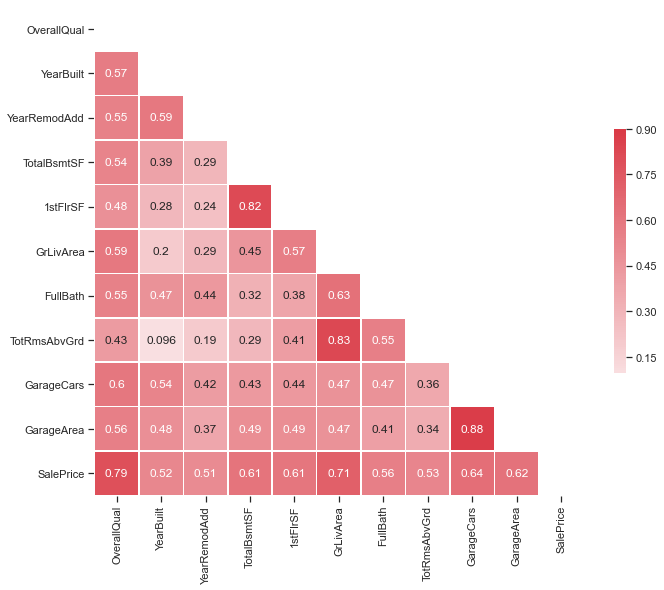

In [8]:
sns.set(style="ticks")
top_corr_var = correlation.index[abs(correlation['SalePrice'])>0.5]
corr_matrix2 = train[top_corr_var].corr()
corr_matrix2
mask = np.triu(np.ones_like(corr_matrix2, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix2, annot=True, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The target variables (SalePrice) is correlated positevely with some features:

- OverallQuall (0.79)
- TotalBsmtSF (0.61)
- 1stFIrSF (0.61)
- GrLivArea (0.71)
- GarageArea (0.62)
- GarageCArs (0.64)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

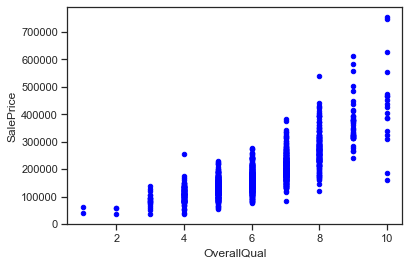

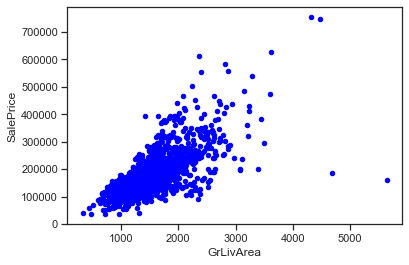

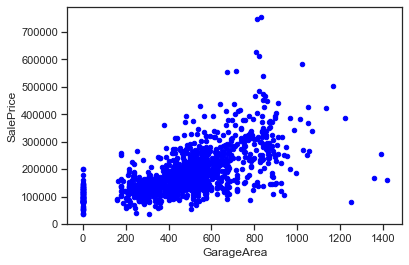

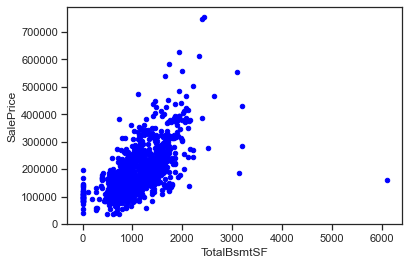

In [9]:
train.plot.scatter(x = 'OverallQual',
                   y ='SalePrice', 
                   color ='blue')

train.plot.scatter(x = 'GrLivArea',
                   y ='SalePrice', 
                   color ='blue')

train.plot.scatter(x = 'GarageArea',
                   y ='SalePrice', 
                   color ='blue')

train.plot.scatter(x = 'TotalBsmtSF',
                   y ='SalePrice', 
                   color ='blue')

 ### Missing Values

#### In this section, we will handle with missing values

Handling missing data is so important during a Datascience project, it has a huge impact on model the performance, but we start first by combining trainning and testing data, to apply same treatements, and we are going to create a new variable for test data called Sale Price and set it to Zero so as we could separate train and test data later

In [10]:
test = pd.read_csv("C:/Users/abdel/Documents/Projects/House_price/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
test['SalePrice'] = 0
data = pd.concat([train, test], axis = 0)
display(data.shape)

(2919, 81)

### We compute missing values for every feature

In [12]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071


Based on the description text file provided, some of the missing values are in fact meaningful. For example, missing values for the feature PoolQC (Pool Quality) means there is no pool. Our strategy for these cases:

- For categorical features, it makes sense to replace these NAs with 'None'.
                         -
- For the numerical features, it makes sense to replace these NAs with 0 (with an exception for GarageYrBuilt that the NAs will be filled with YearBuilt). ( we supposed that Garage and house are built in the same year) 

In [13]:
# NAs = 'None'
false_na_cat_columns = ['PoolQC','MiscFeature','Alley', 
                        'Fence', 'FireplaceQu', 'GarageFinish',
                        'GarageQual', 'GarageCond','GarageType', 
                        'BsmtExposure', 'BsmtCond', 'BsmtQual', 
                        'BsmtFinType2','BsmtFinType1']

data[false_na_cat_columns] = data[false_na_cat_columns].fillna('None')

In [14]:
# NAs = 0
false_na_num_columns = ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
                        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                        'GarageArea', 'GarageCars']
 
data[false_na_num_columns] = data[false_na_num_columns].fillna(0)

In [15]:
# NAs: GarageYrBlt <- YearBuilt
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['YearBuilt'] )

In [16]:
na_columns = data.columns[data.isna().any()]
data[na_columns].isna().sum().sort_values(ascending=False)

LotFrontage    486
MasVnrType      24
MasVnrArea      23
MSZoning         4
Functional       2
Utilities        2
SaleType         1
KitchenQual      1
Electrical       1
Exterior2nd      1
Exterior1st      1
dtype: int64

For the rest of features, we don't have information to understand the meanning of NA values. So, we suppose that NAs are random and we will simply replace NAs by the mode for categorical features, and median  for numerical features.

In [17]:
# NAs = median
na_num_columns = ['MasVnrArea', 'LotFrontage']

for i in na_num_columns: 
    data[i] = data[i].fillna((data[i].median()))

In [18]:
# NAs = mode
na_cat_columns = ['MSZoning', 'Functional', 'Utilities', 
                  'Exterior1st', 'Exterior2nd','Electrical', 
                  'MasVnrType', 'KitchenQual', 'SaleType']

for i in na_cat_columns:
    data[i] = data[i].fillna((data[i].mode().iloc[0]))

Now, we don't have any missing values

In [19]:
na_columns = data.columns[data.isna().any()]
na_columns

Index([], dtype='object')

### Feature engineering
#### Encoding categorial data

Some features are not numericals, so we transform them to numeric values, because most of Machine Learning algorithms work only on numeric values

In [20]:
# Data types
data.drop(['Id', 'SalePrice'], axis = 1).dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

In [21]:
data['PoolQC'].value_counts()

None    2909
Ex         4
Gd         4
Fa         2
Name: PoolQC, dtype: int64

In [22]:
data['ExterQual'] = data['ExterQual'].replace({"Ex": 4, 
                                               "Gd": 3, 
                                               "TA": 2, 
                                               "Fa": 1, 
                                               "Po": 0})

data['ExterCond'] = data['ExterCond'].replace({"Ex": 4, 
                                               "Gd": 3, 
                                               "TA": 2, 
                                               "Fa": 1, 
                                               "Po": 0})

data['BsmtQual'] = data['BsmtQual'].replace({"Ex": 5, 
                                             "Gd": 4, 
                                             "TA": 3, 
                                             "Fa": 2, 
                                             "Po": 1,
                                             "None": 0})

data['BsmtCond'] = data['BsmtCond'].replace({"Ex": 5, 
                                             "Gd": 4, 
                                             "TA": 3, 
                                             "Fa": 2, 
                                             "Po": 1,
                                             "None": 0})

data['BsmtExposure'] = data['BsmtExposure'].replace({"Gd": 4, 
                                                     "Av": 3,
                                                     "Mn": 2,
                                                     "No": 1,
                                                     "None": 0})

data['BsmtFinType1'] = data['BsmtFinType1'].replace({"GLQ": 6, 
                                                     "ALQ": 5,
                                                     "BLQ": 4,
                                                     "Rec": 3,
                                                     "LwQ": 2,
                                                     "Unf": 1,
                                                     "None": 0})

data['BsmtFinType2'] = data['BsmtFinType2'].replace({"GLQ": 6, 
                                                     "ALQ": 5,
                                                     "BLQ": 4,
                                                     "Rec": 3,
                                                     "LwQ": 2,
                                                     "Unf": 1,
                                                     "None": 0})

data['HeatingQC'] = data['HeatingQC'].replace({"Ex": 4, 
                                               "Gd": 3, 
                                               "TA": 2, 
                                               "Fa": 1, 
                                               "Po": 0})

data['KitchenQual'] = data['KitchenQual'].replace({"Ex": 4, 
                                                   "Gd": 3, 
                                                   "TA": 2, 
                                                   "Fa": 1, 
                                                   "Po": 0})

data['FireplaceQu'] = data['FireplaceQu'].replace({"Ex": 5, 
                                                   "Gd": 4, 
                                                   "TA": 3, 
                                                   "Fa": 2, 
                                                   "Po": 1,
                                                   "None": 0})

data['GarageFinish'] = data['GarageFinish'].replace({"Fin": 3, 
                                                     "RFn": 2, 
                                                     "Unf": 1, 
                                                     "None": 0})

data['GarageQual'] = data['GarageQual'].replace({"Ex": 5, 
                                                  "Gd": 4, 
                                                  "TA": 3, 
                                                  "Fa": 2, 
                                                  "Po": 1,
                                                  "None": 0})

data['GarageCond'] = data['GarageCond'].replace({"Ex": 5, 
                                                 "Gd": 4, 
                                                 "TA": 3, 
                                                 "Fa": 2, 
                                                 "Po": 1,
                                                 "None": 0})

data['PavedDrive'] = data['PavedDrive'].replace({"Y":2, 
                                                 "P":1, 
                                                 "N":0})    

data['PoolQC'] = data['PoolQC'].replace({"Ex": 4, 
                                         "Gd": 3, 
                                         "TA": 2, 
                                         "Fa": 1, 
                                         "None": 0})

data['Fence'] = data['Fence'].replace({"None":0, 
                                       "MnWw":1, 
                                       "GdWo":2, 
                                       "MnPrv":3,
                                       "GdPrv":4})

data['LotShape'] = data['LotShape'].replace({"Reg":0, 
                                             "IR1":1, 
                                             "IR2":2, 
                                             "IR3":3})

In [23]:
data = pd.get_dummies(data)

In [24]:
data.shape

(2919, 242)

We split train and test data ( Remember that we initialize the value of Sale Price for test dataset in Zero). We will use 70% of data to train our model, and evaluate it on 30% of fata (test).

In [25]:
# Train
train = data[data.SalePrice > 0]

# Test
test = data[data.SalePrice == 0]
test = test.drop('SalePrice', axis=1)

In [26]:
# log-transformation
y = np.log(train.SalePrice)

In [27]:
y = np.log(train.SalePrice)
X = train.drop(['SalePrice', 'Id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1234, test_size=0.33)

## Model

In this section, we will implement Machine Learning models (Supervised Learning), we will use tree common algorithms:
- Regression(Multiple regression, LASSO, RIDGE and ELASTICNET)
- Random Forest
- Gradient Boosting

Our main goal is to find the best model which givea minimal value of RMSE. 

### Linear regression

In [28]:
# On crée un modèle de régression linéaire
lin_reg = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

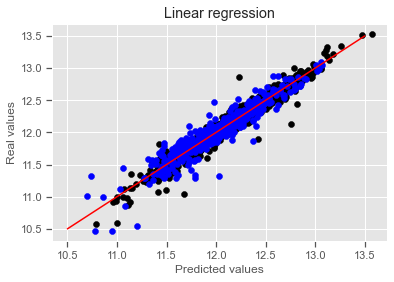

In [36]:
plt.scatter(y_train_pred, y_train, c = "black", marker = "o", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "blue", marker = "o", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")

plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [55]:
mse = mean_squared_error(y_test, lin_reg.predict(X_test))
rmse = math.sqrt(mse)
print(rmse)

0.13106231432595875


We have a large number of features in our data (242), the feature selection is crucial in this case. One common approach to address this problem is using LASSO & Ridge regression, which has the tendency to eliminates the least important features in our model and mitigate overfitting.

The main hyperparameter we need to tune in a LASSO & Ridge regression is the regularization factor alpha. We will use cross-validation to find the best alpha that minimizes the RMSE.

### Lasso

In [32]:
from sklearn.linear_model import Lasso

alphas = np.linspace(0.0001, 0.001, num = 10)

rmse_model_lasso = [np.sqrt(-cross_val_score(linear_model.Lasso(alpha), 
                                   X, y, 
                                   scoring="neg_mean_squared_error")).mean()
          
         for alpha in alphas]

lasso = pd.DataFrame({'alpha':alphas, 'rmse':rmse_model_lasso})

### Plot

<AxesSubplot:xlabel='alpha'>

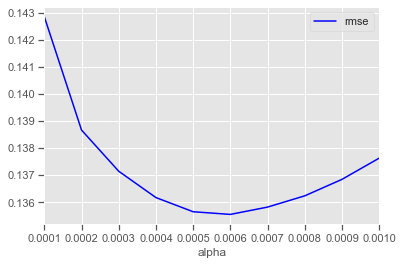

In [35]:
lasso.plot(x = 'alpha',
           y = 'rmse',  
           color ='blue'
          )

In [37]:
lasso.min()

alpha    0.000100
rmse     0.135547
dtype: float64

In [38]:
model = linear_model.Lasso(alpha=0.000100)
model_fit = model.fit(X_train, y_train)
coffecients = pd.Series(model_fit.coef_, index = X_train.columns).sort_values()

In [39]:
print((sum(coffecients == 0)))
print('************ This model eliminate 78 variables to enhance predictions**************')

68
************ This model eliminate 78 variables to enhance predictions**************


## Ridge

In [40]:
alphas = np.linspace(-0.05, 0.01, num = 100)

rmse_model_ridge = [np.sqrt(-cross_val_score(linear_model.Ridge(alpha), 
                                   X, y, 
                                   scoring="neg_mean_squared_error")).mean()
          
         for alpha in alphas]

ridge= pd.DataFrame({'alpha':alphas, 'rmse':rmse_model_ridge})

<AxesSubplot:xlabel='alpha'>

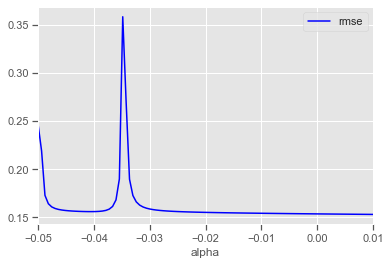

In [41]:
ridge.plot(x = 'alpha',
           y = 'rmse',  
           color ='blue'
          )

In [42]:
ridge.min()

alpha   -0.050000
rmse     0.152941
dtype: float64

### ElasticNet

In [43]:
alphas = np.linspace(0.0008, 0.0011, num=15)
rmse_model_ElasticNet = [np.sqrt(-cross_val_score(linear_model.ElasticNet(alpha), 
                                             X, y, 
                                             scoring="neg_mean_squared_error", 
                                             cv=10)).mean()
                                             
        for alpha in alphas
]


ElasticNet = pd.DataFrame({'alpha':alphas, 'rmse':rmse_model_ElasticNet})

<AxesSubplot:xlabel='alpha'>

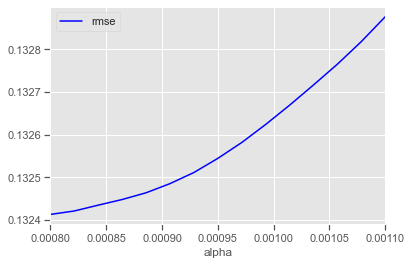

In [44]:
ElasticNet.plot(x = 'alpha',
           y = 'rmse',  
           color ='blue'
          )

In [45]:
ElasticNet.min()

alpha    0.000800
rmse     0.132413
dtype: float64

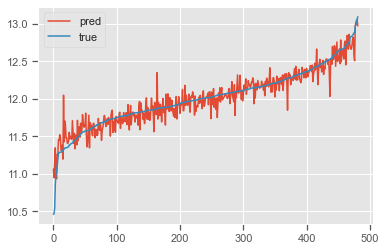

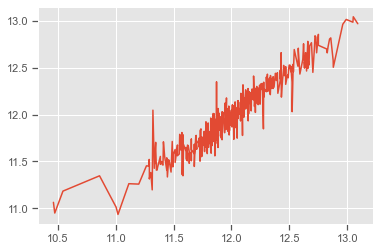

In [46]:
lasso_model = linear_model.ElasticNet(ElasticNet.min()[0])
lasso_model = lasso_model.fit(X_train, y_train)
y_predicted = lasso_model.predict(X_test)
df_res = pd.DataFrame({'true': y_test, 'pred': y_predicted})
df_res = df_res.sort_values('true')

plt.plot( df_res['pred'].values, label='pred')
plt.plot(df_res['true'].values, label='true')
plt.legend()
plt.show()

plt.plot(df_res['true'], df_res['pred']);

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 200, 
                                         random_state = 2020, 
                                         max_features = 'auto')
model_rf = model.fit(X_train, y_train)
pred_y = model_rf.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred_y))

0.1417027001325757

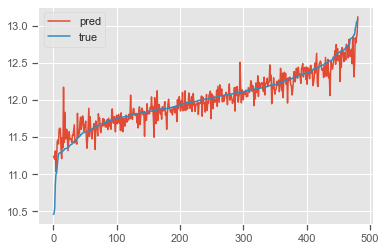

In [48]:
df_res = pd.DataFrame({'true': y_test, 'pred': pred_y})
df_res = df_res.sort_values('true')

plt.plot( df_res['pred'].values, label='pred')
plt.plot(df_res['true'].values, label='true')
plt.legend()
plt.show()

### Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 2000,
                                  random_state =2020
                                 )

model_boost = model.fit(X_train, y_train)
pred_y = model_boost.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred_y))

0.12560497170751875

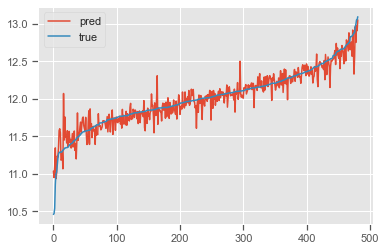

In [50]:
df_res = pd.DataFrame({'true': y_test, 'pred': pred_y})
df_res = df_res.sort_values('true')

plt.plot( df_res['pred'].values, label='pred')
plt.plot(df_res['true'].values, label='true')
plt.legend()
plt.show()

Based on these models, we find that Gradient Boosting gave the best result with an (RMSE = 0.12)

### Submission

In [57]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [58]:
# GBM model prediction
predictions = np.exp(model_boost.predict(test.drop('Id', axis =1)))

In [59]:
# Submission file
submission['SalePrice'] = predictions
submission.to_csv('submission.csv', index=False)

## Conclusion

We have until now, the different treatements for data to make predictions.

We could get a better result by applying some imporvements, like: creating new features, dealing with outliers, Select best features, multicolnearity...